# Neural Network Example

Build a 2-hidden layers fully connected neural network (a.k.a multilayer perceptron) with TensorFlow.

## Neural Network Overview

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>

## MNIST Dataset Overview

이 예제는 MNIST(수기로 작성된 숫자) 데이터를 사용합니다. 이 데이터 세트에는 훈련을 위한 60,000 개의 예제와 테스트를 위한 10,000 개의 예제가 포함되어 있습니다. 

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

More info: http://yann.lecun.com/exdb/mnist/

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

기존의 방법은 앞으로 지원이 중단될 예정이므로, 다음과 같은 방식으로 데이터를 로드

In [2]:
train, test = tf.keras.datasets.mnist.load_data()

Keras에서 가져온 MNIST 데이터는 0-255 범위를 지닌 28x28 행렬

값의 범위를 0~1 사이로 조정하고, 행렬을 768 크기의 1 차원으로 벡터로 변환

In [3]:
train_x, train_y = train
train_x = train_x / 255.0
train_x = train_x.reshape(60000, 28*28)

In [4]:
test_x, test_y = test
test_x = test_x / 255.0
test_x = test_x.reshape(10000, 28*28)

Parameters
* learning_rate : 학습률 
* num_steps : 훈련 횟수 
* batch_size : 배치 크기 
* display_step : 화면 출력 조정 

In [5]:
# Parameters
learning_rate = 0.1
num_steps = 1000
batch_size = 128
display_step = 100

Network Parameters
* num_input : shape of input data
* n_hidden : hidden layer
* num_classes : output node (one hot encode)

In [ ]:
# Network Parameters
num_input = 784 # MNIST data input (img shape: 28*28)
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_classes = 10 # MNIST total classes (0-9 digits)

model training에 필요한 파라미터 지정

In [6]:
# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': train_x}, y=train_y,
    batch_size=batch_size, num_epochs=None, shuffle=True)

뉴럴 네트워크 설계

In [7]:
# Define the neural network
def neural_net(x_dict):
    # TF Estimator input is a dict, in case of multiple inputs
    x = x_dict['images']
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.layers.dense(x, n_hidden_1)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.layers.dense(layer_2, num_classes)
    return out_layer

앞서 작성한 네트워크를 사용하는 모델 함수 작성

Parameter
* features : 학습할 train data
* labels : train data의 레이블 데이터
* mode : train / predict / evaluate 

학습에 필요한 메서드 정의
* loss : cross_entropy loss function
* optimizer : Gradient Descent Optimizer

In [8]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    
    # Build the neural network
    logits = neural_net(features)
    
    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)
    
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})

    return estim_specs

작성한 모델 함수를 빌드

In [9]:
# Build the Estimator
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/vf/y11p57_10fxdw7w2cs1sz63h0000gn/T/tmp4uvkbk8t', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1191be4a8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


모델 훈련 실행

In [10]:
# Train the Model
model.train(input_fn, steps=num_steps)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/vf/y11p57_10fxdw7w2cs1sz63h0000gn/T/tmp4uvkbk8t/model.ckpt.
INFO:tensorflow:loss = 2.451299445799574, step = 1
INFO:tensorflow:global_step/sec: 106.34
INFO:tensorflow:loss = 0.4434206297121514, step = 101 (0.942 sec)
INFO:tensorflow:global_step/sec: 114.898
INFO:tensorflow:loss = 0.30541545090078015, step = 201 (0.870 sec)
INFO:tensorflow:global_step/sec: 127.913
INFO:tensorflow:loss = 0.37183163712044165, step = 301 (0.782 sec)
INFO:tensorflow:global_step/sec: 129.682
INFO:tensorflow:loss = 0.4631692205307634, step = 401 (0.771 sec)
INFO:tensorflow:global_step/sec: 133.028
INFO:tensorflow:loss = 0.2319090029254407, step = 501 (0.752 sec)
INFO:tensorflow:global_step/sec: 111.35
INFO:tensorflow:l

훈련된 모델 테스트 데이터로 성능 평가

In [11]:
# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_x}, y=test_y,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
model.evaluate(input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-12-03:31:50
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/vf/y11p57_10fxdw7w2cs1sz63h0000gn/T/tmp4uvkbk8t/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-12-03:31:50
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.9172, global_step = 1000, loss = 0.2913107


{'accuracy': 0.9172, 'loss': 0.2913107, 'global_step': 1000}

훈련된 모델로 예측 수행

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/vf/y11p57_10fxdw7w2cs1sz63h0000gn/T/tmp4uvkbk8t/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


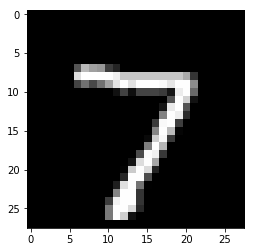

Model prediction: 7


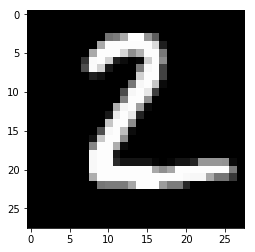

Model prediction: 2


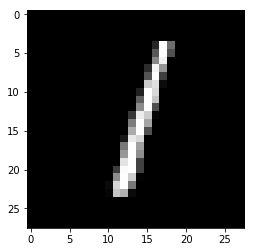

Model prediction: 1


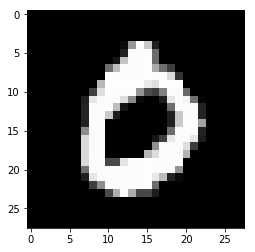

Model prediction: 0


In [12]:
# Predict single images
n_images = 4
# Get images from test set
test_images = test_x[:n_images]
# Prepare the input data
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images}, shuffle=False)
# Use the model to predict the images class
preds = list(model.predict(input_fn))

# Display
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", preds[i])